In [1]:
## testing multidark
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
import h5py
import astropy.io.fits as fits
import csv
import pandas as pd
import h5py
import tables
import pickle5 as pickle
import os
from astropy.table import Table
from astropy.coordinates import SkyCoord
from tqdm import tqdm
from astropy.io import ascii
import pickle
import os
from glob import glob
import scipy

In [2]:
from timeit import default_timer as timer

In [3]:
datadir = '/global/homes/z/zzhang13/BaryonPasting/CorrelatedStructures/multiDark/data/'
plot_dir = '/global/homes/z/zzhang13/BaryonPasting/CorrelatedStructures/multiDark/plots/'
halos_dir = clusters_z1p03_file = '/global/cscratch1/sd/zzhang13/MultiDark/MDPL2_ROCKSTAR_Halos/z0p00/' 

In [4]:
with open(datadir + 'MDPL2_DS_R200c_SAGE_Ngal_allM_allz.p', 'rb') as handle:
    matched_halo_df = pickle.load(handle)
matched_halo_df.columns

Index(['id', 'Xoff', 'scale', 'CtreesHaloID', 'pid', 'mvir', 'rvir', 'rs', 'x',
       'y', 'z', 'Mmvir_all', 'M200b', 'M200c', 'M500c', 'T/|U|',
       'Halfmass_Scale', 'Acc_Rate_Inst', 'Acc_Rate_100Myr', 'Acc_Rate_1*Tdyn',
       'Acc_Rate_2*Tdyn', 'Acc_Rate_Mpeak', 'c_vir', 'R200c', 'R500c',
       'redshift', 'Ngal_Dsep_1', 'Ngal_Rvir', 'Ngal_R200c', 'Ngal_R500c',
       'sigma', 'r_range', 'delta_sigma'],
      dtype='object')

In [5]:
## Testing the file properties. 
r_bins_log_norm = np.linspace(-1,1,21)
r_bins_lin_norm = 10**r_bins_log_norm
r_cent_log_norm= (r_bins_log_norm[1:] + r_bins_log_norm[:-1])/2
r_cent_lin_norm = 10**r_cent_log_norm

### Plotting DS in all bins


In [6]:
mass_bin_edges = [5e13, 1e14, 2e14, 5e14, 1e15]
mass_bins = [[mass_bin_edges[i],mass_bin_edges[i+1]] for i in range(len(mass_bin_edges)-1)]

a_bins = [1, 0.6712, 0.4922]
column_name ='Acc_Rate_2*Tdyn'

M5e+13-1e+14, z=0.00
M5e+13-1e+14, z=0.49
M5e+13-1e+14, z=1.03
M1e+14-2e+14, z=0.00
M1e+14-2e+14, z=0.49
M1e+14-2e+14, z=1.03
M2e+14-5e+14, z=0.00
M2e+14-5e+14, z=0.49
M2e+14-5e+14, z=1.03
M5e+14-1e+15, z=0.00
M5e+14-1e+15, z=0.49
M5e+14-1e+15, z=1.03


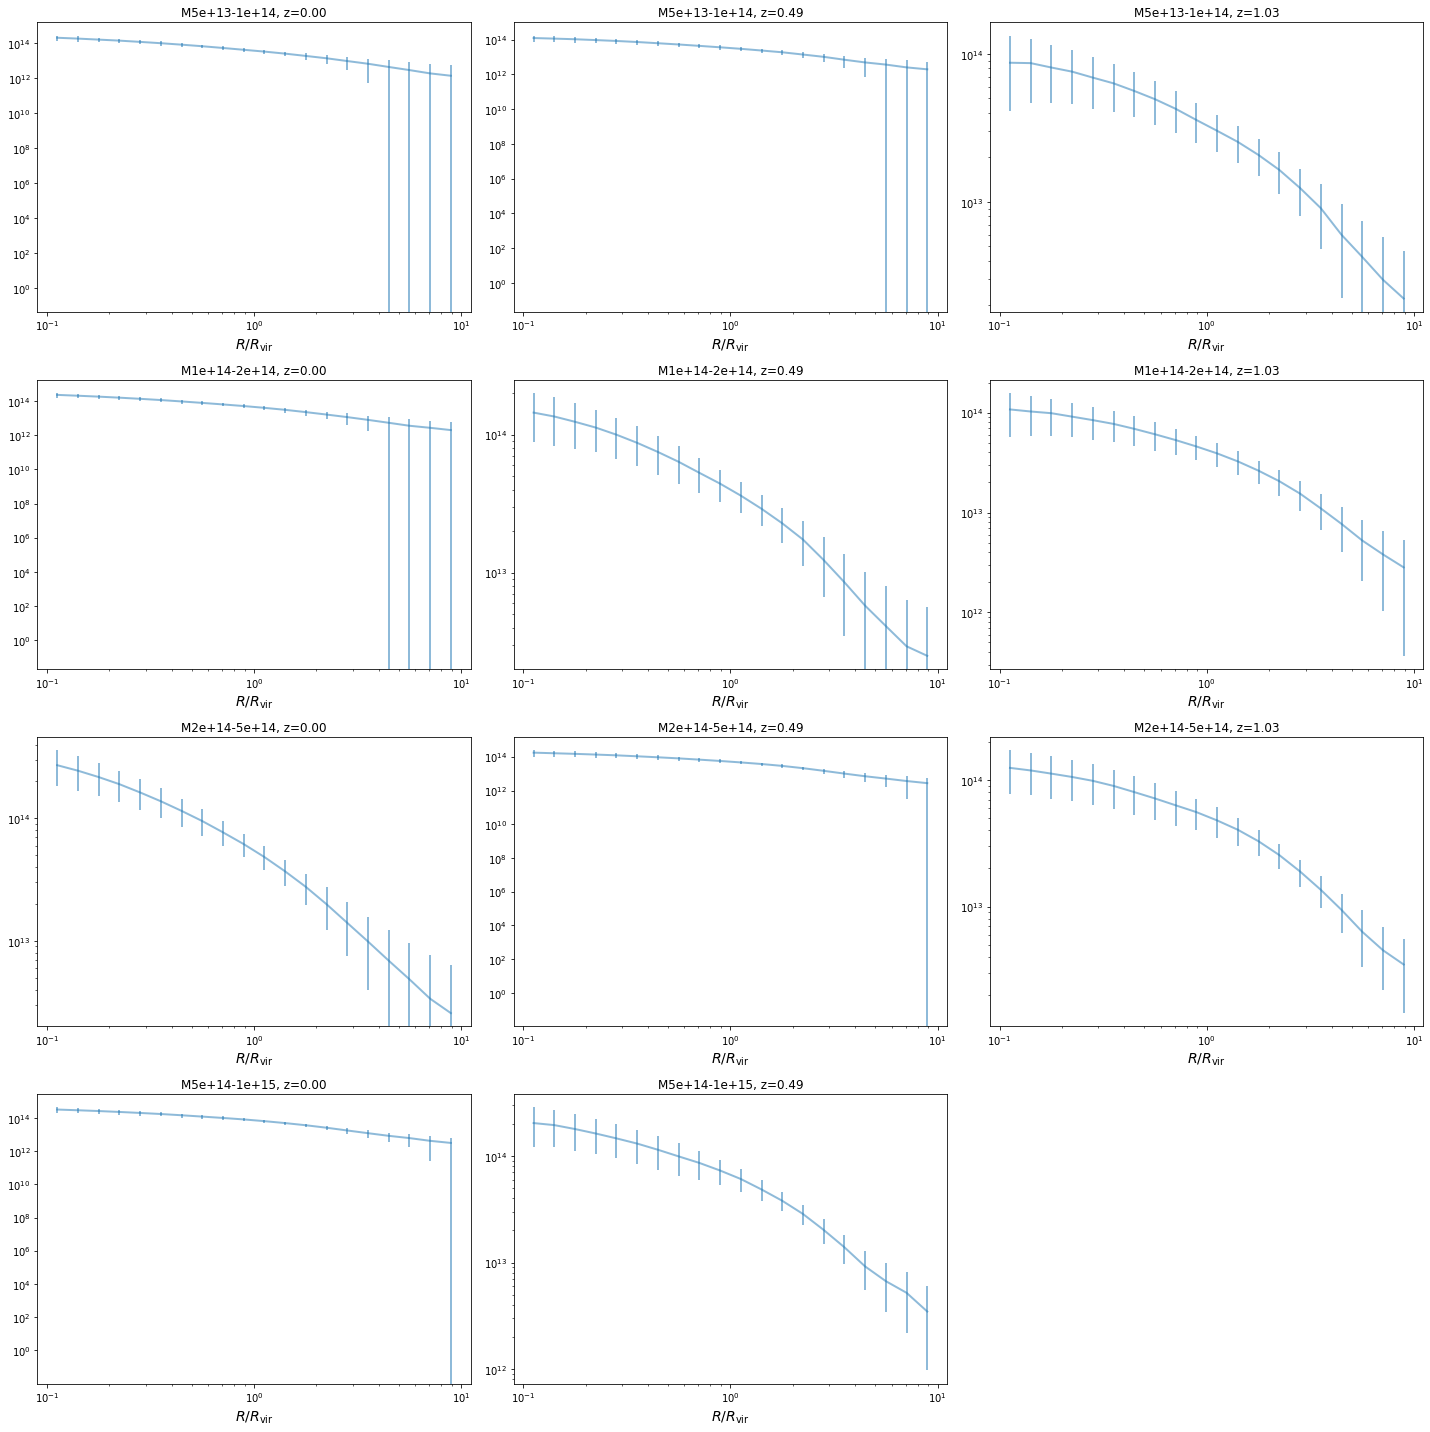

In [7]:
from scipy import stats
nBootstrap = 5
X_params = ['T/|U|', 'c_vir', 'Halfmass_Scale', 'Acc_Rate_2*Tdyn']
#X_params = ['c_vir', 'Acc_Rate_2*Tdyn']

fig, axs = plt.subplots(4,3,figsize=(20,20), tight_layout=True)

for i, cur_mass_bin in enumerate(mass_bins):
    for j, cur_a_bin in enumerate(a_bins):     
        mass_min = cur_mass_bin[0]; mass_max = cur_mass_bin[1]
        print('M{:.2g}-{:.2g}, z={:.2f}'.format(mass_min, mass_max, 1/cur_a_bin-1))
        
        mask = (matched_halo_df.mvir >= mass_min) & (matched_halo_df.mvir < mass_max) & (matched_halo_df.scale == cur_a_bin) 
        cur_df = matched_halo_df[mask]
        
        
        if len(cur_df) < 100: 
            axs[i,j].set_visible(False)
            continue
        
        DS_cur = np.vstack(cur_df['delta_sigma'])
        DS_all = np.vstack(matched_halo_df['delta_sigma'])
        #axs[i,j].errorbar(r_cent_lin_norm, np.mean(DS_all,axis=0), yerr = np.std(DS_all,axis=0), label='All', linewidth=2, alpha=1)
        axs[i,j].errorbar(r_cent_lin_norm, np.mean(cur_df['delta_sigma'],axis=0), yerr = np.std(DS_cur,axis=0), linewidth=2, alpha=0.5)
        
        
        ##Plotting configu
        axs[i,j].axhline(0,linestyle='dashed', color='black')
        axs[i,j].set_xscale('log'); axs[i,j].set_yscale('log')
        axs[i,j].set_xlabel(r'$R/R_{\rm vir}$', fontsize=14)
        axs[i,j].set_title('M{:.2g}-{:.2g}, z={:.2f}'.format(mass_min, mass_max, 1/cur_a_bin-1))
        
#axs[0,0].legend(loc='lower left')

#plt.savefig('cov_time_formation.png')
plt.show()

In [8]:
delta=200.0
omega_m=0.3089
omega_l=0.6911
omega_b = 0.0486 
hubble=0.6774
redshift = 0.49
dz=200

aexp = 1./(1.+redshift)
Ez = np.sqrt(omega_m/aexp**3.0+omega_l)
fb = omega_b/omega_m
mu = 0.59
mue = 1.14
delta = float(delta)
erg_to_keV = 624150647.99632

# critical density of the Universe in h^2*Msun/Mpc^3
rho_crit = (2.77536627e11)*(Ez)**2.0

### Background density
rho_bkgr = rho_crit * omega_m
rho_2d_bkgr = rho_bkgr * 2 * dz

print('{:.2g}'.format(rho_2d_bkgr))

5.9e+13


## Theoretical curves

In [9]:
import cluster_toolkit

In [10]:
import camb
from camb import model, initialpower

#Set cosmological parameters
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.74, ombh2=0.022, omch2=0.122)
pars.set_dark_energy(w=-1.0)
pars.InitPower.set_params(ns=0.965)

#This sets the k limits and specifies redshifts
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

#Linear P(k)
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 1000)

#Note: the above function has the maxkh argument for specifying a different
#kmax than was used above.
#Note: pk has the shape (N_z, N_k)

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
khnl, znl, pknl = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 1000)

Note: redshifts have been re-sorted (earliest first)


In [11]:
## Universal parameters
radii = np.logspace(-2, 3, 1000) #Mpc/h comoving
R_perp = np.logspace(-2, 2.4, 1000) #Mpc/h comoving; distance on the sky
Omega_m = 0.3089

Deleted outdated persistence file, no further action needed.


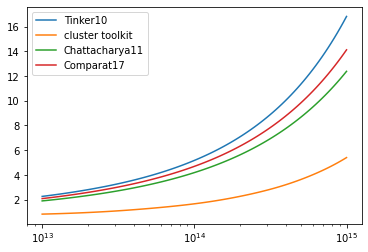

In [12]:
from colossus.lss import peaks
from colossus.lss import bias
from cluster_toolkit import bias as cluster_bias

from colossus.cosmology import cosmology
from colossus.halo import concentration
cosmology.setCosmology('planck15')

M = np.logspace(13,15,100)
z = 1
nu = peaks.peakHeight(M, z)
b = bias.haloBiasFromNu(nu, model = 'sheth01')
b = bias.haloBias(M, model = 'tinker10', z = z, mdef = '200c')

b_tinker10 = bias.haloBias(M, model = 'tinker10', z = z, mdef = '200c')
b_pillepich10 = bias.haloBias(M, model = 'pillepich10', z=z, mdef = '200c')
b_bhattacharya11 = bias.haloBias(M, model = 'bhattacharya11', z=z, mdef = '200c')
b_tinker10_cluster = cluster_bias.bias_at_M(M, khnl, pknl, Omega_m)

plt.plot(M, b_tinker10, label='Tinker10')
plt.plot(M, b_tinker10_cluster, label='cluster toolkit')
plt.plot(M, b_bhattacharya11, label='Chattacharya11')
plt.plot(M, b_pillepich10, label = 'Comparat17')
plt.xscale('log')
plt.legend()
plt.show()

In [13]:
import cluster_toolkit
from cluster_toolkit import xi
from cluster_toolkit import deltasigma
from cluster_toolkit import bias as cluster_bias

def compute_DS_nonlinear(mass, concentration, halo_bias):
    global radii
    global R_perp
    global Omega_m
    global khnl, pknl
    
    xi_nfw = xi.xi_nfw_at_r(radii, mass, concentration, Omega_m)
    #Assume that k and P come from somewhere, e.g. CAMB or CLASS
    xi_mm = xi.xi_mm_at_r(radii, khnl, pknl)
    #Assume that k and P_linear came from somewhere, e.g. CAMB or CLASS
    xi_2halo = xi.xi_2halo(halo_bias, xi_mm)
    xi_hm = np.maximum(xi_nfw, xi_2halo)

    #Assume that radii and xi_hm are computed here
    Sigma = deltasigma.Sigma_at_R(R_perp, radii, xi_hm, mass, concentration, Omega_m)
    DeltaSigma_theory = deltasigma.DeltaSigma_at_R(R_perp, R_perp, Sigma, mass, concentration, Omega_m)*1e12 ## In units of Msun/Mpc^2
    
    return DeltaSigma_theory

def compute_DS_linear(mass, concentration, halo_bias):
    global radii
    global R_perp
    global Omega_m
    global kh, pk
    
    xi_mm = xi.xi_mm_at_r(radii, kh, pk)
    xi_nfw = xi.xi_nfw_at_r(radii, mass, concentration, Omega_m)
    #Assume that k and P come from somewhere, e.g. CAMB or CLASS
    xi_mm = xi.xi_mm_at_r(radii, kh, pk)
    #Assume that k and P_linear came from somewhere, e.g. CAMB or CLASS
    xi_2halo = xi.xi_2halo(halo_bias, xi_mm)
    xi_hm = np.maximum(xi_nfw, xi_2halo)

    #Assume that radii and xi_hm are computed here
    Sigma = deltasigma.Sigma_at_R(R_perp, radii, xi_hm, mass, concentration, Omega_m)
    DeltaSigma_theory = deltasigma.DeltaSigma_at_R(R_perp, R_perp, Sigma, mass, concentration, Omega_m)*1e12 ## In units of Msun/Mpc^2
    
    return DeltaSigma_theory

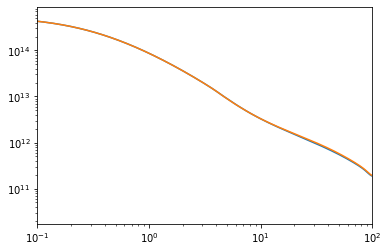

In [14]:
DS_NL = compute_DS_nonlinear(5e14, 8, 3)
DS_Lin = compute_DS_linear(5e14, 8, 3)
plt.plot(R_perp, DS_NL)
plt.plot(R_perp, DS_Lin)
plt.xlim([0.1,100])
plt.xscale('log')
plt.yscale('log')

In [15]:
## Mass concentration relationship
def mass_concentration_Comerford07(mvir, z):
    c0 = 10
    M_star = 1.3*10**13
    alpha = -0.25

    return c0/(1+z)*(mvir/M_star)**alpha

def mass_concentration_Comerford07(mvir, z):
    c0 = 10
    M_star = 1.3*10**13
    alpha = -0.25

    return c0/(1+z)*(mvir/M_star)**alpha

##Test another mass concentration relationship


def mass_concentration_Diemer19(M200c, z):
    cvir = concentration.concentration(M200c, '200c', z, model = 'diemer19')
    return cvir

def mass_concentration_Prada12(M200c, z):
    cvir = concentration.concentration(M200c, '200c', z, model = 'prada12')
    return cvir

def mass_concentration_Ludlow16(M200c, z):
    cvir = concentration.concentration(M200c, '200c', z, model = 'ludlow16')
    return cvir


Deleted outdated persistence file, no further action needed.


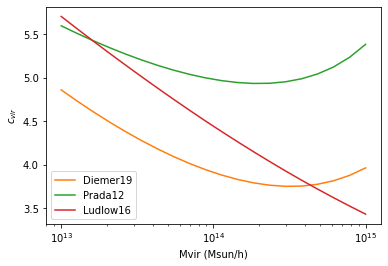

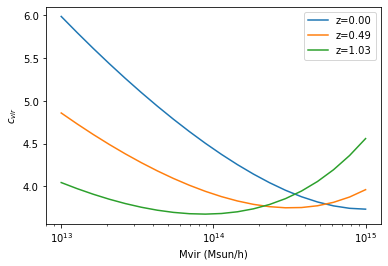

In [16]:
M200c = np.logspace(13,15,20)
z = [0, 0.49, 1.03]
for cur_z in [0.49]:
    c_Diemer19 = mass_concentration_Diemer19(M200c, cur_z)
    c_Prada12 = mass_concentration_Prada12(M200c, cur_z)
    c_Ludlow16 = mass_concentration_Ludlow16(M200c, cur_z)
    plt.plot(M200c, c_Diemer19, color = 'C1', label='Diemer19')
    plt.plot(M200c, c_Prada12, color = 'C2', label='Prada12')
    plt.plot(M200c, c_Ludlow16, color = 'C3', label='Ludlow16')

plt.legend()
plt.xscale('log')
plt.xlabel('Mvir (Msun/h)')
plt.ylabel(r'$c_{vir}$')
plt.show()


z = [0, 0.49, 1.03]
for cur_z in z:
    c_Diemer19 = mass_concentration_Diemer19(M200c, cur_z)
    plt.plot(M200c, c_Diemer19, label='z={:.2f}'.format(cur_z))


plt.legend()
plt.xscale('log')
plt.xlabel('Mvir (Msun/h)')
plt.ylabel(r'$c_{vir}$')
plt.show()


## Todo
* Plot the linear power spectrum using Diemer19
* Plot a different kind of halo bias using Diemer19

In [17]:
linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]


In [18]:
def as_si(x, ndp):
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))

In [19]:
matched_halo_df.columns

Index(['id', 'Xoff', 'scale', 'CtreesHaloID', 'pid', 'mvir', 'rvir', 'rs', 'x',
       'y', 'z', 'Mmvir_all', 'M200b', 'M200c', 'M500c', 'T/|U|',
       'Halfmass_Scale', 'Acc_Rate_Inst', 'Acc_Rate_100Myr', 'Acc_Rate_1*Tdyn',
       'Acc_Rate_2*Tdyn', 'Acc_Rate_Mpeak', 'c_vir', 'R200c', 'R500c',
       'redshift', 'Ngal_Dsep_1', 'Ngal_Rvir', 'Ngal_R200c', 'Ngal_R500c',
       'sigma', 'r_range', 'delta_sigma'],
      dtype='object')

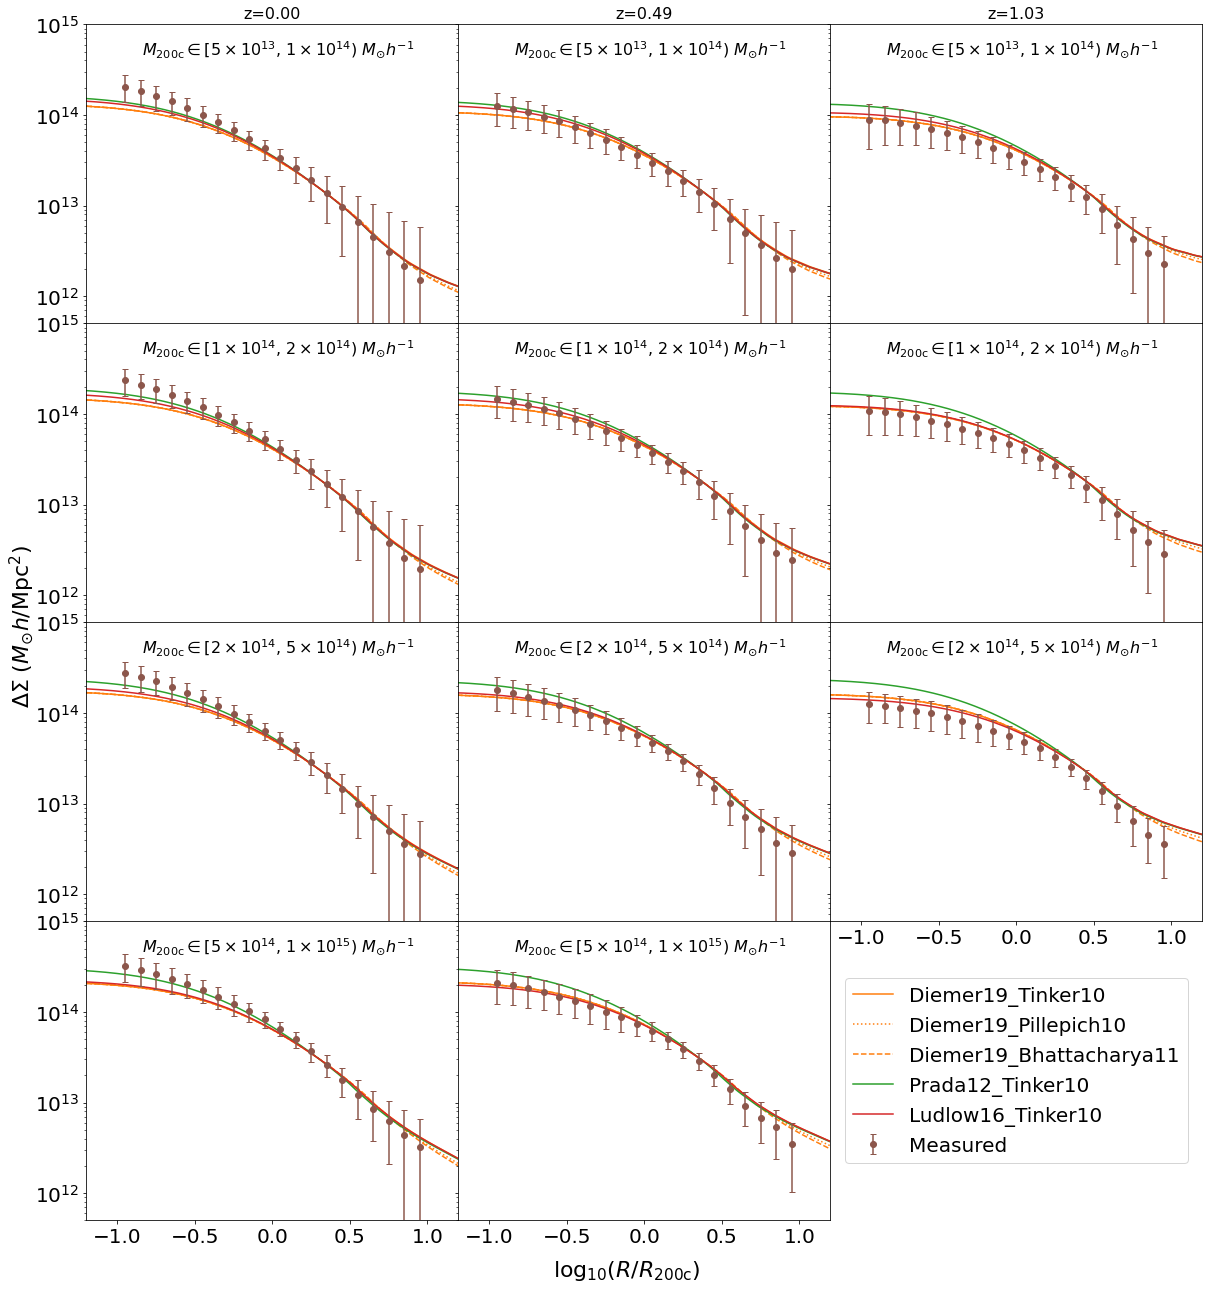

In [24]:
## Plotting the theoretical vs. measured in all bins
fig, axs = plt.subplots(4, 3, figsize=(20,22), sharex=False, sharey=True)
fig.subplots_adjust(hspace=0, wspace=0)
fontsize=22
nBootstrap=20
legendsize = 20


from scipy import stats

for i, cur_mass_bin in enumerate(mass_bins):
    for j, cur_a_bin in enumerate(a_bins):     
        
        mass_min = cur_mass_bin[0]; mass_max = cur_mass_bin[1]
        mask = (matched_halo_df.M200c >= mass_min) & (matched_halo_df.M200c < mass_max) & (matched_halo_df.scale == cur_a_bin) 
        cur_df = matched_halo_df[mask]
        
        if len(cur_df) < 100: 
            axs[i,j].axis("Off")
            continue
        
    
        DS_cur = np.vstack(cur_df.delta_sigma)
        cur_z = 1/cur_a_bin - 1
        M200c = np.mean(cur_df.M200c)
        c_Diemer19 = mass_concentration_Diemer19(M200c, cur_z)
        c_Prada12 = mass_concentration_Prada12(M200c, cur_z)
        c_Ludlow16 = mass_concentration_Ludlow16(M200c, cur_z)
        r200c_mean = np.mean(cur_df.R200c)
        
        #print('Mean mass: {:.2g}, mean R200c: {:.2g}'.format(M200c, r200c_mean))
        
        ##Bias term
        b_tinker10 = bias.haloBias(M200c, model = 'tinker10', z = cur_z, mdef = '200c')
        b_pillepich10 = bias.haloBias(M200c, model = 'pillepich10', z=cur_z, mdef = '200c')
        b_bhattacharya11 = bias.haloBias(M200c, model = 'bhattacharya11', z=cur_z, mdef = '200c')
        #print("Tinker bias: ", b_tinker10)
        #print('c_Diemer19: ', c_Diemer19)
        
        ##Changing the concentration
        DS_linear_Diemer19 = compute_DS_linear(M200c, c_Diemer19, b_tinker10)
        DS_linear_Prada12 = compute_DS_linear(M200c, c_Prada12, b_tinker10)
        DS_linear_Ludlow16 = compute_DS_linear(M200c, c_Ludlow16, b_tinker10)
        
        ##Alternative forms of Diemer19 concentration, test the linear and the halo bias
        #DS_linear_Diemer19 = compute_DS_linear(M200c, c200c_Diemer19, b_tinker10)
        DS_linear_Diemer19_pillepich10 = compute_DS_linear(M200c, c_Diemer19, b_pillepich10)
        DS_linear_Diemer19_bhattacharya11 = compute_DS_linear(M200c, c_Diemer19, b_bhattacharya11)
        
        axs[i,j].plot(np.log10(R_perp/r200c_mean), DS_linear_Diemer19, label='Diemer19_Tinker10', color='C1')
        axs[i,j].plot(np.log10(R_perp/r200c_mean), DS_linear_Diemer19_pillepich10 , label='Diemer19_Pillepich10', color='C1', linestyle='dotted')
        axs[i,j].plot(np.log10(R_perp/r200c_mean), DS_linear_Diemer19_bhattacharya11, label='Diemer19_Bhattacharya11', color='C1', linestyle='dashed')
        axs[i,j].plot(np.log10(R_perp/r200c_mean), DS_linear_Prada12, label='Prada12_Tinker10', color='C2')
        axs[i,j].plot(np.log10(R_perp/r200c_mean), DS_linear_Ludlow16, label='Ludlow16_Tinker10', color='C3')
        
        #axs[i,j].plot(R_perp/r200c_mean, DS_linear_Diemer19, label='Diemer19_Lin_Tinker10', color='C4')
        axs[i,j].errorbar(np.log10(r_cent_lin_norm), np.mean(DS_cur,axis=0), yerr = 1*np.std(DS_cur,axis=0), marker="o", capsize=3, linestyle='None', color='C5', label='Measured')
        
        ##Plotting configuration
        #axs[i,j].axhline(0,linestyle='dashed', color='black')
        #axs[i,j].set_xscale('log'); 
        axs[i,j].set_yscale('log')
        axs[i,j].set_ylim([0.5e12,1e15])
        axs[i,j].set_xlim([-1.2,1.2])
        #axs[i,j].set_xlabel(r'$R/R_{\rm 200c}$', fontsize=14)
        
        axs[i,j].xaxis.set_tick_params(labelsize=20)
        axs[i,j].yaxis.set_tick_params(labelsize=20)
    
        ##Plotting configure
        
        ##Plotting configure
        axs[i,j].axhline(0,linestyle='dashed', color='black')
        #axs[i,j].set_xscale('log'); #plt.yscale('log')
        
        if i == 0: axs[i,j].set_title('z={:.2f}'.format(1/cur_a_bin-1), fontsize=16)
        axs[i,j].text(0.15, 0.9,  r'$M_{\rm 200c} \in $'+r'[${0:s}$, '.format(as_si(mass_min,0)) + r'${0:s}$)'.format(as_si(mass_max,0)) + ' $M_{\odot}h^{-1}$', \
                                 fontsize = 16, transform=axs[i,j].transAxes)
        
        ##Hide labels
        #if j == 0:
        #    axs[i,j].set_ylabel(r'$\Delta\Sigma(R)$ ($M_{\odot}h$/Mpc$^2$)', fontsize=fontsize)
        
        #x_label_on_inds = np.array([[3,3,2],[0,1,2]])
        #for ind in range(len(x_label_on_inds[0])):
        #    if (i==x_label_on_inds[0,ind]) & (j==x_label_on_inds[1,ind]): axs[i,j].set_xlabel(r'$R/R_{\rm 200}$', fontsize=fontsize)

            
fig.text(0.5, 0.09, r'$\log_{10}(R/R_{\rm 200c})$', fontsize=fontsize, ha='center')
fig.text(0.07, 0.5, r'$\Delta\Sigma$ ($M_{\odot}h$/Mpc$^2$)', fontsize=fontsize, va='center', rotation='vertical')
            
axs[3,0].legend(loc='center', bbox_to_anchor=(2.5,0.5), fontsize=legendsize)
plt.margins(tight=True)

plt.savefig(plot_dir+'DS_R200c_measured_vs_theory.pdf', bbox_inches='tight')
plt.show()


In [21]:
## Test the DS run at z=0.00

file = '/global/homes/z/zzhang13/BaryonPasting/CorrelatedStructures/multiDark/data/' + 'sigma_mvir_1e14_2e14_z0p00.pkl'

with open(file, 'rb') as handle:
    ds_halos_dict = pickle.load(handle)

In [22]:
ds_halos = ds_halos_dict['delta_sigma']
cvir = mass_concentration_Comerford07(2e14, 0)
DS_theory = compute_DS_theory(2e14, cvir)*1e12 ##Convert from Msun/pc/h^2 to Msun/Mpc/h^2

ds_mean = np.mean(ds_halos, axis=0)
ds_err = np.std(ds_halos, axis=0)
plt.plot(R_perp/1.2, DS_theory, label='Theory')
plt.errorbar(r_cent_lin_norm, ds_mean-2e13, yerr=ds_err, label='Measured')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1,1e1])
plt.legend()
plt.show()

NameError: name 'compute_DS_theory' is not defined

In [ ]:
from cluster_toolkit import deltasigma
Sigma_nfw = deltasigma.Sigma_nfw_at_R(R_perp, mass, concentration, Omega_m)

In [ ]:
from cluster_toolkit import deltasigma



In [ ]:
plt.plot(R_perp/1.7, DeltaSigma_theory*1e12 , label='theory')
DS_all = np.vstack(matched_halo_df['delta_sigma'])
plt.errorbar(r_cent_lin_norm, np.mean(DS_all,axis=0), yerr = np.std(DS_all,axis=0), label='All', linewidth=2, alpha=1)

plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$R/R_{\rm vir}$', fontsize=14)
plt.legend()
plt.show()

In [ ]:
plt.plot(R_perp/1.7, Sigma*1e12 , label='theory')
Sigma_all = np.vstack(matched_halo_df['sigma'])
plt.errorbar(r_cent_lin_norm, np.mean(Sigma_all,axis=0), yerr = np.std(Sigma_all,axis=0), label='All', linewidth=2, alpha=1)

plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$R/R_{\rm vir}$', fontsize=14)
plt.legend()
plt.show()